<div class="alert alert-block alert-success">
    
    
# <center> Project - Phase 3 </center>
## <center> Descriptive Statistics </center>
### <center> Exploratory Data Analysis</center>


<br>
    
</div>

<div class="alert alert-block alert-danger">
    
    

### Requirements: 
- Load and inspect Transactions.csv dataset
- Execute descriptive analytics tasks for Orders distribution for products sold in different Zip Codes


<br>
    
</div>

In [ ]:
import pandas as pd

import datetime
from datetime import datetime, date, timedelta
import time
from math import isnan
import numpy as np

# !conda install plotly seaborn -y
import plotly
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.express as px

In [180]:
pd.options.display.max_columns = None

In [45]:
import numpy
print(numpy.__version__)

1.19.2




<div class="alert alert-info">

  
    
## Load and Preprocess the data
- Count how many total deliveries
- Count how many deliveries per Zip Code
- Total number of Orders 
- Total number of Orders per Zip Code
- Total Number of Products ordered per Zip Code
- Total Number of Orders for every Product in every Zip Code per Month

</div>
    
    
    


In [46]:
df = pd.read_csv('Transactions.csv')
df = df.dropna()
df['Delivery_Zip_Code'] = df['Delivery_Zip_Code'].astype(int)
df.head()

,CustomerID,FirstName,LastName,CreditCardNumber,OrderID,Customer_Occupation,Credit_Card_Number,Order_ID,Order_Date,Expected_Delivery_Date,...,Product_Name,Category,Manufacturer,Review_Rating,Delivery_Tracking_ID,Delivery_Type,Delivery_Zip_Code,Transaction_Status,Order_Returned,Order_Delivered_on_Time
0,566-26-0321,Rebeka,Stokes,xxxx-xxxx-xxxx-2650,50787284-d78d-4b6a-b93f-7419b0d46590,Lawyer,12345789032,98,4/7/2020,4/11/2020,...,Fitbit small,fitness,Fitbit small,3,98,Pickup,10048,Disputed,1,1
1,274-18-0017,Rahsaan,Koch,xxxx-xxxx-xxxx-5055,f61639d7-28de-4507-a63a-71e99921d8f9,Lawyer,12345789032,131,5/10/2020,5/14/2020,...,Fitbit small,fitness,Fitbit small,3,131,Pickup,10048,Disputed,1,1
2,455-28-7950,Zion,Osinski,xxxx-xxxx-xxxx-0150,7b1caf69-bd5b-441c-9115-6fa31ba1c313,Lawyer,12345789032,318,11/13/2020,11/17/2020,...,Fitbit small,fitness,Fitbit small,3,318,Pickup,10048,Disputed,1,1
3,254-72-5938,Ward,Brekke,xxxx-xxxx-xxxx-5280,cb58e8e9-572b-4d9e-af9f-dbecf9dfd3c5,Actor,12345789032,528,2/12/2020,2/16/2020,...,Fitbit large,fitness,Fitbit large,5,528,Pickup,10048,Disputed,0,1
4,563-47-8401,Terrence,Franecki,xxxx-xxxx-xxxx-1019,a9d66460-a48f-419f-8d39-7818290a3041,Actor,12345789032,561,2/12/2020,2/16/2020,...,Fitbit large,fitness,Fitbit large,5,561,Pickup,10048,Disputed,0,1


In [47]:
df['Order_ID'].count()

16372

In [48]:
df['Expected_Delivery_Date'] = pd.to_datetime(df['Expected_Delivery_Date'])
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Actual_Delivery_Date'] = pd.to_datetime(df['Actual_Delivery_Date'])
df.set_index('Actual_Delivery_Date', inplace=True)
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
df['week_of_year'] = df.index.weekofyear

<ipython-input-48-3bf3e74c753b>:8: FutureWarning:

weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)



In [49]:
df.dtypes

CustomerID                         object
FirstName                          object
LastName                           object
CreditCardNumber                   object
OrderID                            object
Customer_Occupation                object
Credit_Card_Number                  int64
Order_ID                            int64
Order_Date                 datetime64[ns]
Expected_Delivery_Date     datetime64[ns]
Product_ID                         object
Product_Name                       object
Category                           object
Manufacturer                       object
Review_Rating                       int64
Delivery_Tracking_ID                int64
Delivery_Type                      object
Delivery_Zip_Code                   int32
Transaction_Status                 object
Order_Returned                      int64
Order_Delivered_on_Time             int64
year                                int64
month                               int64
day                               

In [50]:
df.head()

,CustomerID,FirstName,LastName,CreditCardNumber,OrderID,Customer_Occupation,Credit_Card_Number,Order_ID,Order_Date,Expected_Delivery_Date,...,Delivery_Tracking_ID,Delivery_Type,Delivery_Zip_Code,Transaction_Status,Order_Returned,Order_Delivered_on_Time,year,month,day,week_of_year
Actual_Delivery_Date,,,,,,,,,,,,,,,,,,,,,
2020-04-15,566-26-0321,Rebeka,Stokes,xxxx-xxxx-xxxx-2650,50787284-d78d-4b6a-b93f-7419b0d46590,Lawyer,12345789032,98,2020-04-07,2020-04-11,...,98,Pickup,10048,Disputed,1,1,2020,4,15,16
2020-05-18,274-18-0017,Rahsaan,Koch,xxxx-xxxx-xxxx-5055,f61639d7-28de-4507-a63a-71e99921d8f9,Lawyer,12345789032,131,2020-05-10,2020-05-14,...,131,Pickup,10048,Disputed,1,1,2020,5,18,21
2020-11-21,455-28-7950,Zion,Osinski,xxxx-xxxx-xxxx-0150,7b1caf69-bd5b-441c-9115-6fa31ba1c313,Lawyer,12345789032,318,2020-11-13,2020-11-17,...,318,Pickup,10048,Disputed,1,1,2020,11,21,47
2020-02-20,254-72-5938,Ward,Brekke,xxxx-xxxx-xxxx-5280,cb58e8e9-572b-4d9e-af9f-dbecf9dfd3c5,Actor,12345789032,528,2020-02-12,2020-02-16,...,528,Pickup,10048,Disputed,0,1,2020,2,20,8
2020-02-20,563-47-8401,Terrence,Franecki,xxxx-xxxx-xxxx-1019,a9d66460-a48f-419f-8d39-7818290a3041,Actor,12345789032,561,2020-02-12,2020-02-16,...,561,Pickup,10048,Disputed,0,1,2020,2,20,8






<div class="alert alert-info">

  
    
## Descriptive Analytics


</div>
    

In [51]:
df.groupby(['Product_Name'])['Expected_Delivery_Date'].count().reset_index(name ='Total_orders_per_product')

,Product_Name,Total_orders_per_product
0,Bose,910
1,Fitbit large,2903
2,Fitbit small,2904
3,Harman Kardon,1445
4,JBL,910
5,Logitech,1525
6,Redmi,910
7,Samsung s10,910
8,Sony,2435
9,VR7,1520


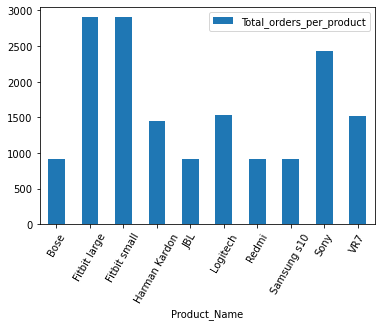

In [52]:
ax = df.groupby(['Product_Name'])['Expected_Delivery_Date'].count().reset_index(name ='Total_orders_per_product').plot.bar(x='Product_Name', y='Total_orders_per_product', rot=60)





<div class="alert alert-info">

  
    
## Deliveries/Orders per  Zip Code Distribution


</div>
    


In [53]:
df.groupby(['Delivery_Zip_Code'])['Expected_Delivery_Date'].count().reset_index(name ='Total_orders_per_zipcode')

,Delivery_Zip_Code,Total_orders_per_zipcode
0,10048,413
1,10110,394
2,10121,391
3,10123,439
4,10168,416
...,...,...
57,90076,369
58,90077,292
59,90080,301
60,90097,395


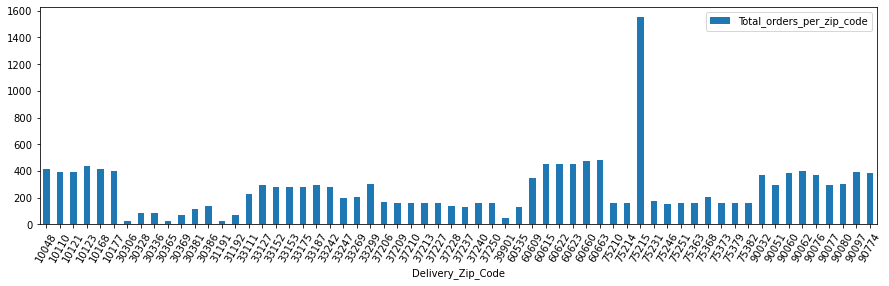

In [54]:
ax1 = df.groupby(['Delivery_Zip_Code'])['Expected_Delivery_Date'].count().reset_index(name ='Total_orders_per_zip_code').plot.bar(x='Delivery_Zip_Code', y='Total_orders_per_zip_code', rot=60, figsize=(15, 4))


In [55]:
Categories = df['Category'].unique()
Categories

array(['fitness', 'phone', 'speaker', 'tv', 'vr'], dtype=object)

In [56]:
Zips = df['Delivery_Zip_Code'].unique()
Zips

array([10048, 10110, 10121, 10123, 10168, 10177, 30306, 30328, 30336,
       30365, 30369, 30381, 30386, 31191, 31192, 33111, 33127, 33152,
       33153, 33175, 33187, 33242, 33247, 33269, 33299, 37206, 37209,
       37210, 37213, 37227, 37228, 37237, 37240, 37250, 39901, 60609,
       60535, 60615, 60622, 60623, 60660, 60663, 75210, 75214, 75215,
       75231, 75246, 75251, 75363, 75368, 75373, 75379, 75382, 90032,
       90051, 90060, 90062, 90076, 90077, 90080, 90097, 90774])

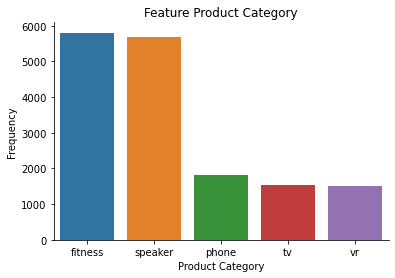

In [57]:
sort_X1 = df.groupby('Category').size()\
                    .sort_values(ascending=False)\
                    .index
#plt.figure(figsize=(12,6))
sns.countplot(x='Category', data=df, order = sort_X1)
plt.xlabel('Product Category')
plt.ylabel('Frequency')
plt.title('Feature Product Category')
sns.despine();

In [58]:
df_bx = pd.DataFrame({'count' : df.groupby( [ "Category", "Delivery_Zip_Code"] ).size()}).reset_index()


df_bx[1:303]

,Category,Delivery_Zip_Code,count
1,fitness,10110,139
2,fitness,10121,137
3,fitness,10123,154
4,fitness,10168,147
5,fitness,10177,148
...,...,...,...
298,vr,90060,38
299,vr,90062,41
300,vr,90076,40
301,vr,90077,27


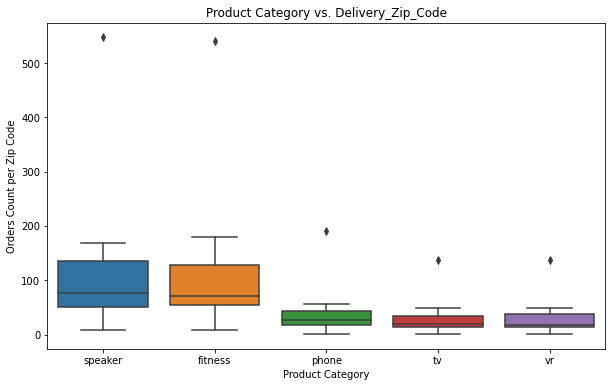

In [59]:
sort_y = df_bx.groupby('Category')['count']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
plt.figure(figsize = (10, 6))

sns.boxplot(y='count', x='Category', data=df_bx, order=sort_y)

ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels())
plt.xlabel('Product Category')
plt.ylabel('Orders Count per Zip Code')
plt.title('Product Category vs. Delivery_Zip_Code')
plt.show();



<div class="alert alert-info">

  
    
## Time Series Forecasting

- Calculate Total number of orders per Date


</div>



In [60]:
slice_for_zip_code = df.loc[df['Delivery_Zip_Code'] == 60535]

In [61]:
df_deliveries_count = slice_for_zip_code.groupby(['Expected_Delivery_Date'])['Order_ID'].count().reset_index(name ='Total_Number_of_orders')
df_deliveries_count

,Expected_Delivery_Date,Total_Number_of_orders
0,2018-01-10,1
1,2018-01-16,1
2,2018-01-18,2
3,2018-01-31,1
4,2018-02-05,1
...,...,...
107,2020-11-11,1
108,2020-11-18,1
109,2020-11-26,1
110,2020-11-29,1



<div class="alert alert-info">

  
    
## Distribution of Products Bought in Zip Codes

- Create 6-months bins


</div>






In [62]:
bins_dt = pd.date_range('2018-01-01', freq='6MS', periods=8)
bins_str = bins_dt.astype(str).values

labels = ['(2018-01-01, 2018-06-31)',
          '(2018-07-01, 2018-12-31)',
          '(2019-01-01, 2019-06-31)',
          '(2019-07-01, 2019-12-31)',
          '(2020-01-01, 2020-06-31)',
          '(2020-07-01, 2020-12-31)',
          '(2021-01-01, 2021-06-31)']
df_6_months_bins = df.groupby(['Expected_Delivery_Date'
                   ,'Product_Name'
                   ,'Delivery_Zip_Code'])['Order_ID'].count().reset_index(name ='Total_Number_of_orders')

df_6_months_bins['bins'] = pd.cut(df_6_months_bins['Expected_Delivery_Date'].astype(np.int64)//10**9,
                   bins=bins_dt.astype(np.int64)//10**9,
                   labels=labels)

In [63]:
df_6_months_bins

,Expected_Delivery_Date,Product_Name,Delivery_Zip_Code,Total_Number_of_orders,bins
0,2018-01-05,Logitech,33242,2,"(2018-01-01, 2018-06-31)"
1,2018-01-05,Logitech,60622,1,"(2018-01-01, 2018-06-31)"
2,2018-01-05,Logitech,75215,1,"(2018-01-01, 2018-06-31)"
3,2018-01-05,Logitech,90062,1,"(2018-01-01, 2018-06-31)"
4,2018-01-05,Redmi,37210,1,"(2018-01-01, 2018-06-31)"
...,...,...,...,...,...
12102,2021-01-04,Samsung s10,10123,1,"(2021-01-01, 2021-06-31)"
12103,2021-01-04,Samsung s10,33127,1,"(2021-01-01, 2021-06-31)"
12104,2021-01-04,Samsung s10,75210,1,"(2021-01-01, 2021-06-31)"
12105,2021-01-04,Samsung s10,75214,1,"(2021-01-01, 2021-06-31)"


In [64]:
grouped_bin_df = df_6_months_bins.groupby(['bins','Product_Name','Delivery_Zip_Code'])['Total_Number_of_orders'].sum().reset_index(name ='Total_Number_of_orders')
grouped_bin_df['Total_Number_of_orders'] = grouped_bin_df['Total_Number_of_orders'].fillna(0)
grouped_bin_df.head(10)

,bins,Product_Name,Delivery_Zip_Code,Total_Number_of_orders
0,"(2018-01-01, 2018-06-31)",Bose,10048,2
1,"(2018-01-01, 2018-06-31)",Bose,10110,2
2,"(2018-01-01, 2018-06-31)",Bose,10121,1
3,"(2018-01-01, 2018-06-31)",Bose,10123,2
4,"(2018-01-01, 2018-06-31)",Bose,10168,4
5,"(2018-01-01, 2018-06-31)",Bose,10177,0
6,"(2018-01-01, 2018-06-31)",Bose,30306,0
7,"(2018-01-01, 2018-06-31)",Bose,30328,0
8,"(2018-01-01, 2018-06-31)",Bose,30336,2
9,"(2018-01-01, 2018-06-31)",Bose,30365,0



<div class="alert alert-info">

  
    
## Lets filter total orders for specific list of Zip Codes

- List of Zip Codes: [60623, 60663, 60609, 60660, 60615, 60622]


</div>


In [65]:
zip_codes = [60623, 60663, 60609, 60660, 60615, 60622]
grouped_bin_df = grouped_bin_df[grouped_bin_df.Delivery_Zip_Code.isin(zip_codes)]
grouped_bin_df

,bins,Product_Name,Delivery_Zip_Code,Total_Number_of_orders
36,"(2018-01-01, 2018-06-31)",Bose,60609,6
37,"(2018-01-01, 2018-06-31)",Bose,60615,2
38,"(2018-01-01, 2018-06-31)",Bose,60622,8
39,"(2018-01-01, 2018-06-31)",Bose,60623,3
40,"(2018-01-01, 2018-06-31)",Bose,60660,7
...,...,...,...,...
4315,"(2021-01-01, 2021-06-31)",VR7,60615,0
4316,"(2021-01-01, 2021-06-31)",VR7,60622,0
4317,"(2021-01-01, 2021-06-31)",VR7,60623,0
4318,"(2021-01-01, 2021-06-31)",VR7,60660,0


<ipython-input-66-b1796c73c68c>:5: UserWarning:

FixedFormatter should only be used together with FixedLocator



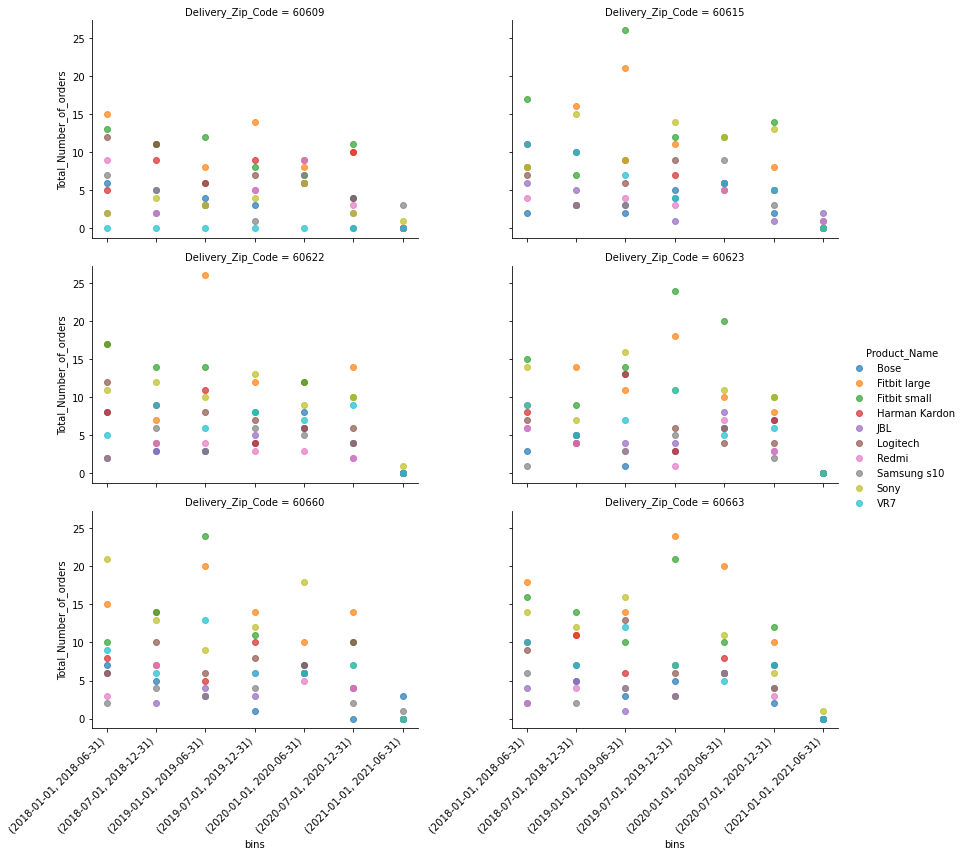

In [66]:
g = sns.FacetGrid(grouped_bin_df, col="Delivery_Zip_Code", hue="Product_Name", margin_titles=True, col_wrap=2, height=4, aspect=1.5)
g.map(plt.scatter, 'bins', 'Total_Number_of_orders', alpha=.7)
ha = ['right', 'center', 'left']
for axes in g.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=45, ha=ha[0])
plt.tight_layout(h_pad=1)
g.add_legend();





<div class="alert alert-info">

  
    
## Total number of Orders per Month
- for selected Zip Codes: [60623, 60663, 60609, 60660, 60615, 60622]



</div>


In [67]:
monthly_df = df.groupby(['month',
                         'Delivery_Zip_Code'])['OrderID'].count().reset_index(name ='Total_Number_of_orders_per_month')
monthly_df = monthly_df[monthly_df.Delivery_Zip_Code.isin(zip_codes)]
monthly_df

,month,Delivery_Zip_Code,Total_Number_of_orders_per_month
36,1,60609,45
37,1,60615,59
38,1,60622,54
39,1,60623,68
40,1,60660,66
...,...,...,...
714,12,60615,39
715,12,60622,36
716,12,60623,32
717,12,60660,41


In [68]:
monthly_df_products = df.groupby(['month',
                         'Product_Name',
                         'Delivery_Zip_Code'])['OrderID'].count().reset_index(name ='Total_Number_of_orders_per_month')
monthly_df_products = monthly_df_products[monthly_df_products.Delivery_Zip_Code.isin(zip_codes)]
monthly_df_products

,month,Product_Name,Delivery_Zip_Code,Total_Number_of_orders_per_month
21,1,Bose,60609,4
22,1,Bose,60615,4
23,1,Bose,60622,4
24,1,Bose,60623,2
25,1,Bose,60660,6
...,...,...,...,...
4973,12,VR7,60615,2
4974,12,VR7,60622,4
4975,12,VR7,60623,4
4976,12,VR7,60660,2





<div class="alert alert-info">

  
    
## Total number of Orders  per Zip Code per Month
- for selected Zip Codes: [60623, 60663, 60609, 60660, 60615, 60622]



</div>


C:\Users\steve\miniconda3\envs\streaming\lib\site-packages\seaborn\axisgrid.py:643: UserWarning:

Using the pointplot function without specifying `order` is likely to produce an incorrect plot.



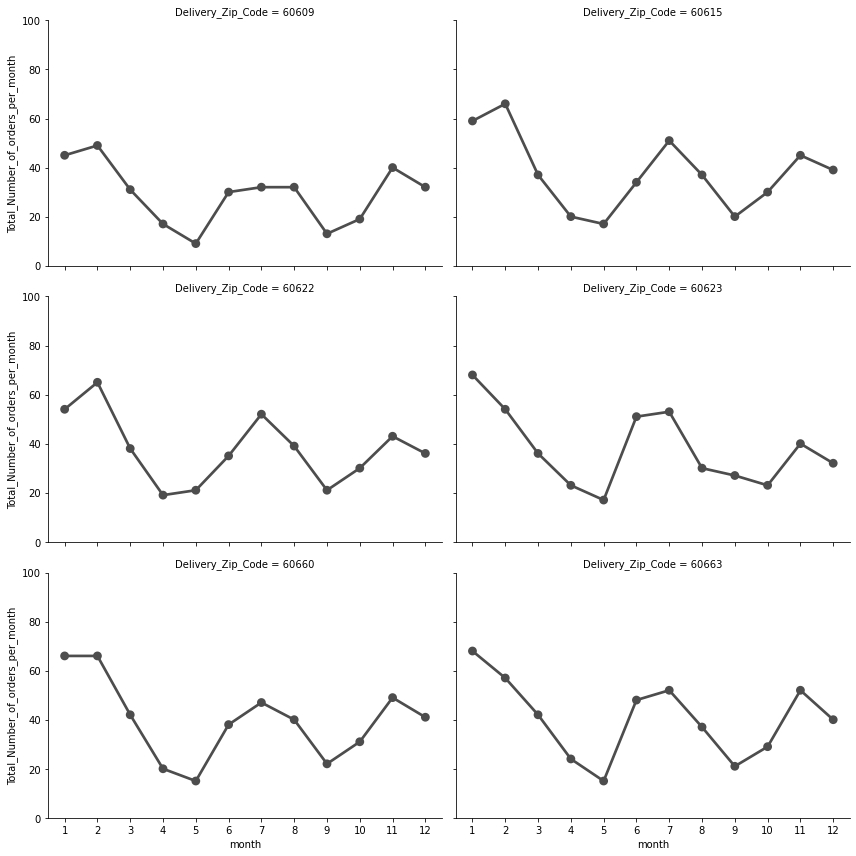

In [69]:
g = sns.FacetGrid(monthly_df, col="Delivery_Zip_Code", col_wrap=2,  ylim=(0, 100), height=4, aspect=1.5)
g.map(sns.pointplot, "month", "Total_Number_of_orders_per_month", color=".3", ci=None);





<div class="alert alert-info">

  
    
## Total Number of Orders per Product per Zip Code per Month:
- for selected Zip Codes: [60623, 60663, 60609, 60660, 60615, 60622]





</div>

C:\Users\steve\miniconda3\envs\streaming\lib\site-packages\seaborn\axisgrid.py:643: UserWarning:

Using the pointplot function without specifying `order` is likely to produce an incorrect plot.



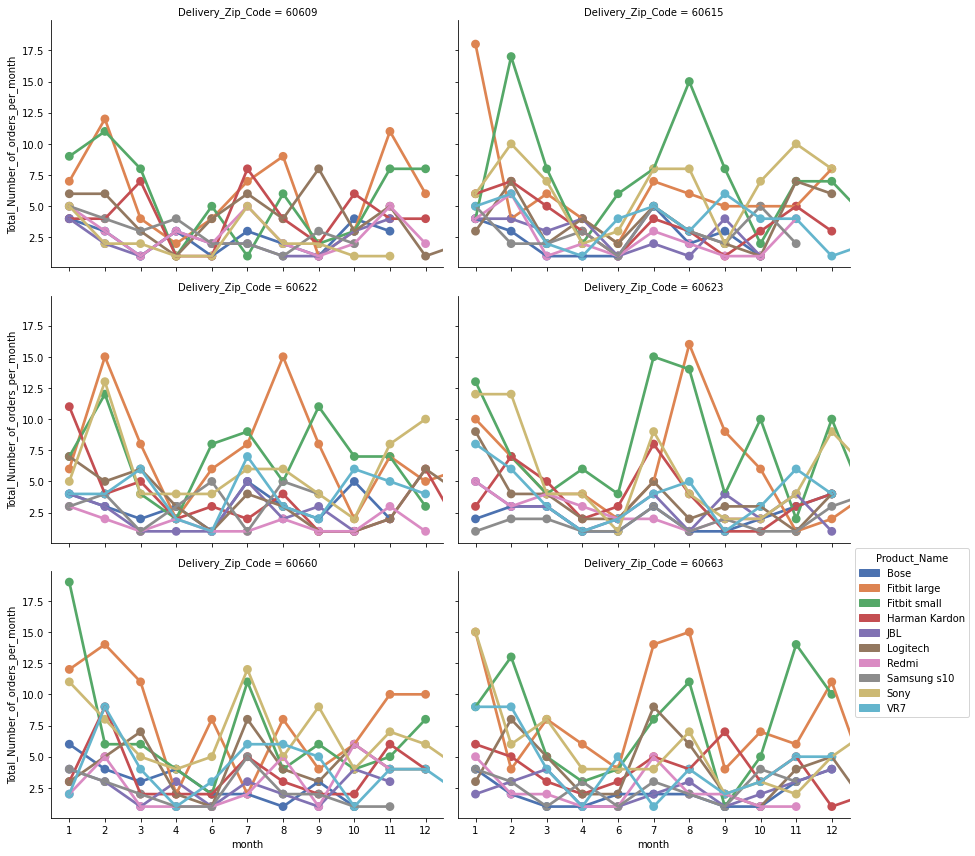

In [70]:
from matplotlib import patches
g = sns.FacetGrid(monthly_df_products, col="Delivery_Zip_Code", 
                  hue="Product_Name",
                  margin_titles=True, 
                  col_wrap=2, palette="deep", 
                  height=4, aspect=1.5)

g.map(sns.pointplot, "month", "Total_Number_of_orders_per_month", ci=None)  # 
labels = ["Bose","Fitbit large","Fitbit small","Harman Kardon","JBL","Logitech","Redmi","Samsung s10","Sony","VR7"] #hue_order
colors = sns.color_palette("deep").as_hex()[:len(labels)]
handles=[patches.Patch(color=col,label=lab) for col,lab in zip(colors,labels)]
plt.legend(handles=handles,title='Product_Name',loc='center left',bbox_to_anchor=(1,0.75));

In [71]:
fig = px.line(df_deliveries_count, x='Expected_Delivery_Date', y='Total_Number_of_orders')
fig.update_layout(title_text='Time Series of daily order counts for all users for zip code: 60535')
fig.show()



<div class="alert alert-success">

# Project Phase 3 
    
## Requirements

    

</div>

In [72]:
df_wd = pd.read_csv('Warehouse_Distribution_Centers.csv')
df_wd.head()

,Zip,City,State,Latitude,Longitude,Facility_ID at given Location/Zip,Distribution Center ID Serving this Zip Code,Warehouse ID supplying this Distribution Center
0,60651,Chicago,IL,41.901485,-87.74055,Warehouse_1,DistributionCenter_1,Warehouse_1
1,60697,Chicago,IL,41.811929,-87.68732,NaN,DistributionCenter_1,Warehouse_1
2,60667,Chicago,IL,41.811929,-87.68732,NaN,DistributionCenter_1,Warehouse_1
3,60694,Chicago,IL,41.811929,-87.68732,NaN,DistributionCenter_1,Warehouse_1
4,60684,Chicago,IL,41.811929,-87.68732,NaN,DistributionCenter_1,Warehouse_1


In [182]:
df_merged = df.merge(df_wd.rename(columns={'Zip':'Delivery_Zip_Code',
                                   ' Distribution Center ID Serving this Zip Code':'distro_id',
                                   'Warehouse ID supplying this Distribution Center':'warehouse_id'}),
             on='Delivery_Zip_Code',
             how='left')
display(df_merged.columns)
df_merged

Index(['CustomerID', 'FirstName', 'LastName', 'CreditCardNumber', 'OrderID',
       'Customer_Occupation', 'Credit_Card_Number', 'Order_ID', 'Order_Date',
       'Expected_Delivery_Date', 'Product_ID', 'Product_Name', 'Category',
       'Manufacturer', 'Review_Rating', 'Delivery_Tracking_ID',
       'Delivery_Type', 'Delivery_Zip_Code', 'Transaction_Status',
       'Order_Returned', 'Order_Delivered_on_Time', 'year', 'month', 'day',
       'week_of_year', 'City', 'State', 'Latitude', 'Longitude',
       'Facility_ID at given Location/Zip', 'distro_id', 'warehouse_id'],
      dtype='object')

,CustomerID,FirstName,LastName,CreditCardNumber,OrderID,Customer_Occupation,Credit_Card_Number,Order_ID,Order_Date,Expected_Delivery_Date,Product_ID,Product_Name,Category,Manufacturer,Review_Rating,Delivery_Tracking_ID,Delivery_Type,Delivery_Zip_Code,Transaction_Status,Order_Returned,Order_Delivered_on_Time,year,month,day,week_of_year,City,State,Latitude,Longitude,Facility_ID at given Location/Zip,distro_id,warehouse_id
0,566-26-0321,Rebeka,Stokes,xxxx-xxxx-xxxx-2650,50787284-d78d-4b6a-b93f-7419b0d46590,Lawyer,12345789032,98,2020-04-07,2020-04-11,fit3,Fitbit small,fitness,Fitbit small,3,98,Pickup,10048,Disputed,1,1,2020,4,15,16,New York,NY,40.712086,-74.012270,NaN,DistributionCenter_13,Warehouse_4
1,274-18-0017,Rahsaan,Koch,xxxx-xxxx-xxxx-5055,f61639d7-28de-4507-a63a-71e99921d8f9,Lawyer,12345789032,131,2020-05-10,2020-05-14,fit3,Fitbit small,fitness,Fitbit small,3,131,Pickup,10048,Disputed,1,1,2020,5,18,21,New York,NY,40.712086,-74.012270,NaN,DistributionCenter_13,Warehouse_4
2,455-28-7950,Zion,Osinski,xxxx-xxxx-xxxx-0150,7b1caf69-bd5b-441c-9115-6fa31ba1c313,Lawyer,12345789032,318,2020-11-13,2020-11-17,fit3,Fitbit small,fitness,Fitbit small,3,318,Pickup,10048,Disputed,1,1,2020,11,21,47,New York,NY,40.712086,-74.012270,NaN,DistributionCenter_13,Warehouse_4
3,254-72-5938,Ward,Brekke,xxxx-xxxx-xxxx-5280,cb58e8e9-572b-4d9e-af9f-dbecf9dfd3c5,Actor,12345789032,528,2020-02-12,2020-02-16,fit4,Fitbit large,fitness,Fitbit large,5,528,Pickup,10048,Disputed,0,1,2020,2,20,8,New York,NY,40.712086,-74.012270,NaN,DistributionCenter_13,Warehouse_4
4,563-47-8401,Terrence,Franecki,xxxx-xxxx-xxxx-1019,a9d66460-a48f-419f-8d39-7818290a3041,Actor,12345789032,561,2020-02-12,2020-02-16,fit4,Fitbit large,fitness,Fitbit large,5,561,Pickup,10048,Disputed,0,1,2020,2,20,8,New York,NY,40.712086,-74.012270,NaN,DistributionCenter_13,Warehouse_4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16367,564-40-9827,Madie,Mayert,xxxx-xxxx-xxxx-1592,1b69b9ee-3017-429e-9e1b-9994ead619c0,Lawyer,12345789032,11949,2019-06-07,2019-06-11,fit3,Fitbit small,fitness,Fitbit small,3,11949,Pickup,90774,Disputed,1,1,2019,6,15,24,Los Angeles,CA,33.783038,-118.238683,DistributionCenter_37,DistributionCenter_37,Warehouse_12
16368,627-64-3054,Vincent,Ondricka,xxxx-xxxx-xxxx-9291,27f2841e-27cd-42d0-8000-f99b7ad7711d,Lawyer,12345789032,12033,2019-08-30,2019-09-03,fit3,Fitbit small,fitness,Fitbit small,3,12033,Pickup,90774,Disputed,1,1,2019,9,7,36,Los Angeles,CA,33.783038,-118.238683,DistributionCenter_37,DistributionCenter_37,Warehouse_12
16369,564-40-9827,Madie,Mayert,xxxx-xxxx-xxxx-1592,46db23f8-a2aa-48e1-96c4-9c07e89ad8eb,Lawyer,12345789032,12236,2019-02-25,2019-03-01,fit3,Fitbit small,fitness,Fitbit small,3,12236,Pickup,90774,Disputed,1,1,2019,3,5,10,Los Angeles,CA,33.783038,-118.238683,DistributionCenter_37,DistributionCenter_37,Warehouse_12
16370,416-42-9023,Lonzo,Tromp,xxxx-xxxx-xxxx-8745,dbffba44-ac7c-41d5-adfb-5298be07d057,Actor,12345789032,12293,2019-01-21,2019-01-25,fit4,Fitbit large,fitness,Fitbit large,5,12293,Pickup,90774,Disputed,0,1,2019,1,29,5,Los Angeles,CA,33.783038,-118.238683,DistributionCenter_37,DistributionCenter_37,Warehouse_12


<div class="alert alert-info">   
    
## Requirement #3
### Forecast the number of returned orders for every warehouse
    - Consider calculating only the simple average to forecast per day, week, month for every warehouse
    - In subsequent phase we will forecast using use Facebook/Prophet, StatModel, Tensorflow/Keras LSTM

    
</div>

In [171]:
from IPython.display import display_html
from itertools import chain,cycle
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2>{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)


In [174]:
# ADD YOUR CODE HERE
# df_merged.groupby(['warehouse_id','Order_Date', 'Order_Returned']).size()

from datetime import date

start_date = min(df_merged.Order_Date)
end_date = max(df_merged.Order_Date)
delta = end_date - start_date
display('number of days in time period: {}'.format(delta.days))

# test count of returns for warehouse_1 = 1178. this is just over 1/day - correct!
# pd.DataFrame(df_merged[(df_merged['Order_Returned']==1) & (df_merged['warehouse_id']=='Warehouse_1')])

df1 = pd.DataFrame(df_merged.groupby('warehouse_id')['Order_Returned'].sum()/delta.days)
df2 = pd.DataFrame(df_merged.groupby('warehouse_id')['Order_Returned'].sum()/delta.days/7)
df3 = pd.DataFrame(df_merged.groupby('warehouse_id')['Order_Returned'].sum()/delta.days/365*12)

display_side_by_side(df1,df2,df3, titles=['Avg returns/day','Avg returns/week','Avg returns/month']) 

'number of days in time period: 1095'

,Order_Returned
warehouse_id,
Warehouse_1,1.075799
Warehouse_12,0.751598
Warehouse_13,0.513242
Warehouse_15,0.234703
Warehouse_16,0.807306
Warehouse_17,0.270320
Warehouse_18,0.958904
Warehouse_19,0.317808
Warehouse_2,0.372603


<div class="alert alert-info">   
    
## Requirement #4
### Forecast the number of delayed deliveries for every zip code
    - Consider calculating only the simple average to forecast per day, week, month for every zip code
    - In subsequent phase we will forecast using use Facebook/Prophet, StatModel, Tensorflow/Keras LSTM

    
</div>

In [183]:
# ADD YOUR CODE HERE
df_merged_temp = df_merged.copy() # copy the df so we can flip the delayed column for easier summing
df_merged_temp.replace(to_replace={'Order_Delivered_on_Time': {0:1, 1:0}},inplace=True)
df1 = pd.DataFrame(df_merged_temp.groupby('Delivery_Zip_Code')['Order_Delivered_on_Time'].sum()/delta.days)
df2 = pd.DataFrame(df_merged_temp.groupby('Delivery_Zip_Code')['Order_Delivered_on_Time'].sum()/delta.days/7)
df3 = pd.DataFrame(df_merged_temp.groupby('Delivery_Zip_Code')['Order_Delivered_on_Time'].sum()/delta.days/365*12)

display_side_by_side(df1,df2,df3, titles=['Avg delays/day','Avg delays/week','Avg delays/month']) 

,Order_Delivered_on_Time
Delivery_Zip_Code,
10048,0.109589
10110,0.099543
10121,0.100457
10123,0.108676
10168,0.112329
10177,0.094064
30306,0.008219
30328,0.023744
30336,0.021918


<div class="alert alert-info">   
    
## Requirement #5
### Forecast the number of delayed deliveries for every distribution
center
    - Consider calculating only the simple average to forecast per day, week, month for every zip code
    - In subsequent phase we will forecast using use Facebook/Prophet, StatModel, Tensorflow/Keras LSTM

    
</div>

In [184]:
# ADD YOUR CODE HERE
df1 = pd.DataFrame(df_merged_temp.groupby('distro_id')['Order_Delivered_on_Time'].sum()/delta.days)
df2 = pd.DataFrame(df_merged_temp.groupby('distro_id')['Order_Delivered_on_Time'].sum()/delta.days/7)
df3 = pd.DataFrame(df_merged_temp.groupby('distro_id')['Order_Delivered_on_Time'].sum()/delta.days/365*12)

display_side_by_side(df1,df2,df3, titles=['Avg delays/day','Avg delays/week','Avg delays/month']) 

,Order_Delivered_on_Time
distro_id,
DistributionCenter_13,0.530594
DistributionCenter_14,0.094064
DistributionCenter_2,0.683105
DistributionCenter_37,0.484932
DistributionCenter_38,0.315068
DistributionCenter_50,0.151598
DistributionCenter_51,0.508676
DistributionCenter_65,0.578082
DistributionCenter_66,0.207306


<div class="alert alert-info">   
    
## Requirement #6
### Identify top 10 distribution centers with highest number of order returns

    
</div>

In [185]:
# ADD YOUR CODE HERE
df_merged[df_merged['Order_Returned']==1].groupby(['distro_id']).size().sort_values(ascending=False).iloc[:10]

distro_id
DistributionCenter_2     1178
DistributionCenter_65    1050
DistributionCenter_51     884
DistributionCenter_13     882
DistributionCenter_37     823
DistributionCenter_38     562
DistributionCenter_85     415
DistributionCenter_66     348
DistributionCenter_93     296
DistributionCenter_50     257
dtype: int64

<div class="alert alert-info">   
    
## Requirement #7
### Identify top 10 distribution centers with lowest number of order returns

    
</div>

In [186]:
# ADD YOUR CODE HERE
df_merged[df_merged['Order_Returned']==1].groupby(['distro_id']).size().sort_values(ascending=True).iloc[:10]

distro_id
DistributionCenter_84     67
DistributionCenter_86    117
DistributionCenter_14    175
DistributionCenter_50    257
DistributionCenter_93    296
DistributionCenter_66    348
DistributionCenter_85    415
DistributionCenter_38    562
DistributionCenter_37    823
DistributionCenter_13    882
dtype: int64

<div class="alert alert-info">   
    
## Requirement #8
### Identify top 10 distribution centers with lowest number of deliveries

    
</div>

In [187]:
# ADD YOUR CODE HERE
df_merged.groupby(['distro_id']).size().sort_values(ascending=True).iloc[:10]

distro_id
DistributionCenter_84     161
DistributionCenter_86     270
DistributionCenter_14     399
DistributionCenter_50     598
DistributionCenter_93     685
DistributionCenter_66     788
DistributionCenter_85     963
DistributionCenter_38    1252
DistributionCenter_37    1937
DistributionCenter_51    2048
dtype: int64

<div class="alert alert-info">   
    
## Requirement #9
### To offload busiest warehouse with highest number of order returns, identify the warehouse that has the forecast for the highest number of order returns, and find its nearest neighboring warehouse that has the lowest number of order returns (consider 50-200 mile radius)
        - After you identify the warehouse with highest returns and the returns for every warehouse
        - Use Neo4j to calculate the distance of the nearest neighbor
        - You must submit your cyoher code and output from Neo4j in the MARKEDDOWN cell below

    
</div>

In [194]:
from neo4j import GraphDatabase
class Neo4jConnection:
    
    def __init__(self, uri, user, pwd):
        self.__uri = uri
        self.__user = user
        self.__pwd = pwd
        self.__driver = None
        try:
            self.__driver = GraphDatabase.driver(self.__uri, auth=(self.__user, self.__pwd))
        except Exception as e:
            print("Failed to create the driver:", e)
        
    def close(self):
        if self.__driver is not None:
            self.__driver.close()
        
    def query(self, query, db=None):
        assert self.__driver is not None, "Driver not initialized!"
        session = None
        response = None
        try: 
            session = self.__driver.session(database=db) if db is not None else self.__driver.session() 
            response = list(session.run(query))
        except Exception as e:
            print("Query failed:", e)
        finally: 
            if session is not None:
                session.close()
        return response


In [203]:
conn = Neo4jConnection(uri="bolt://localhost:7687", user="pyRead", pwd="pyRead")

In [232]:
# ADD YOUR Python CODE HERE
df_return_avgs = pd.DataFrame(df_merged.groupby('warehouse_id')['Order_Returned'].sum()/delta.days).sort_values('Order_Returned', ascending=False)
df_return_avgs

,Order_Returned
warehouse_id,
Warehouse_1,1.075799
Warehouse_18,0.958904
Warehouse_16,0.807306
Warehouse_4,0.805479
Warehouse_12,0.751598
Warehouse_13,0.513242
Warehouse_2,0.372603
Warehouse_19,0.317808
Warehouse_17,0.270320


In [206]:
query_string = '''
MATCH (Warehouse_1:Warehouse {facility_id: "Warehouse_1"}) 
MATCH (w:Warehouse)
with 
    w.facility_id as Warehouse_id, 
    distance(Point({latitude:Warehouse_1.latitude, longitude:Warehouse_1.longitude}), Point({latitude:w.latitude,
        longitude:w.longitude})) * 0.000621371 
        as distance
WHERE distance > 0 AND distance < 10
RETURN Warehouse_id
'''
closest_warehouses = pd.DataFrame([dict(_) for _ in conn.query(query_string, db='neo4j')])
closest_warehouses

,Warehouse_id
0,Warehouse_2
1,Warehouse_3


##  screenshot of neo4j browser exectution won't display, but i'll include it in the zip. also, I think it's irrelevant since I connected python to neo4j

<div class="alert alert-block alert-warning">
    
- MATCH (Warehouse_1:Warehouse {facility_id: "Warehouse_1"})   
- MATCH (w:Warehouse)  
- WITH w.facility_id as Warehouse_id,   
    distance(Point({latitude:Warehouse_1.latitude, longitude:Warehouse_1.longitude}), Point({latitude:w.latitude, longitude:w.longitude})) * 0.000621371 as distance    
- WHERE distance > 0 AND distance < 10  
- RETURN Warehouse_id     

</div>


![Screenshot 2021-05-14 223414.png]('Screenshot_2021-05-14_223414.jpg')


In [248]:
# of the warehouses found in closest_warehouses, return the index with the minimum avg returns
idx = pd.DataFrame(
    df_merged[df_merged.warehouse_id.isin(closest_warehouses.Warehouse_id.values)]
    .groupby('warehouse_id')['Order_Returned']
    .sum()/delta.days) \
    .sort_values('Order_Returned', ascending=True) \
    [['Order_Returned']].idxmin()

df_return_avgs[df_return_avgs.index.isin(idx.values)]

,Order_Returned
warehouse_id,
Warehouse_3,0.174429


<div class="alert alert-info">   
    
## Requirement #10
### To offload the busiest distribution center with highest number of delayed deliveries, identify the distribution center that has the forecast for the highest number of delayed deliveries, and find its nearest neighboring distribution center that has the lowest number of delayed deliveries (consider 1-20 miles radius)
    
        - After you identify the busiest distribution center with highest number of delayed deliveries and the delayed deliveries for every distribution center
        - Use Neo4j to calculate the distance of the nearest neighbor
        - You must submit your cypher code and output from Neo4j in the MARKEDDOWN cell below

    
</div>

In [250]:
# ADD YOUR Python CODE HERE
df_delay_avgs = pd.DataFrame(df_merged_temp.groupby('distro_id')['Order_Delivered_on_Time'].sum()/delta.days).sort_values('Order_Delivered_on_Time', ascending=False)
df_delay_avgs

,Order_Delivered_on_Time
distro_id,
DistributionCenter_2,0.683105
DistributionCenter_65,0.578082
DistributionCenter_13,0.530594
DistributionCenter_51,0.508676
DistributionCenter_37,0.484932
DistributionCenter_38,0.315068
DistributionCenter_85,0.233790
DistributionCenter_66,0.207306
DistributionCenter_93,0.176256


In [252]:
query_string = '''
MATCH (DistributionCenter_2:Distribution_Center {facility_id: "DistributionCenter_2"}) 
MATCH (d:Distribution_Center)
with 
    d.facility_id as Distro_id, 
    distance(Point({latitude:DistributionCenter_2.latitude, longitude:DistributionCenter_2.longitude}), Point({latitude:d.latitude,
        longitude:d.longitude})) * 0.000621371 
        as distance
WHERE distance > 0 AND distance < 10
RETURN Distro_id, distance
'''
closest_distros = pd.DataFrame([dict(_) for _ in conn.query(query_string, db='neo4j')])
closest_distros

,Distro_id,distance
0,DistributionCenter_1,3.980920
1,DistributionCenter_10,6.338992
2,DistributionCenter_11,7.585323
3,DistributionCenter_3,2.569612
4,DistributionCenter_4,7.585323
5,DistributionCenter_5,7.683553
6,DistributionCenter_6,4.010969
7,DistributionCenter_7,7.585323
8,DistributionCenter_8,7.585323
9,DistributionCenter_9,9.947064


In [268]:
# empty set because of the disto centers within 10 miles of DistributionCenter_2,
# NONE have any orders.  

df_merged_temp[df_merged_temp.distro_id.isin(closest_distros.Distro_id.values)] 

,CustomerID,FirstName,LastName,CreditCardNumber,OrderID,Customer_Occupation,Credit_Card_Number,Order_ID,Order_Date,Expected_Delivery_Date,Product_ID,Product_Name,Category,Manufacturer,Review_Rating,Delivery_Tracking_ID,Delivery_Type,Delivery_Zip_Code,Transaction_Status,Order_Returned,Order_Delivered_on_Time,year,month,day,week_of_year,City,State,Latitude,Longitude,Facility_ID at given Location/Zip,distro_id,warehouse_id


In [276]:
# sanity check, of the zips for the given distro centers - do any of them appear in the transactions file

# zips of distro_ids in closest_distros
zips_search = df_wd[df_wd[' Distribution Center ID Serving this Zip Code'].isin(closest_distros.Distro_id)].Zip
df_merged[df_merged['Delivery_Zip_Code'].isin(zips_search)]

,CustomerID,FirstName,LastName,CreditCardNumber,OrderID,Customer_Occupation,Credit_Card_Number,Order_ID,Order_Date,Expected_Delivery_Date,Product_ID,Product_Name,Category,Manufacturer,Review_Rating,Delivery_Tracking_ID,Delivery_Type,Delivery_Zip_Code,Transaction_Status,Order_Returned,Order_Delivered_on_Time,year,month,day,week_of_year,City,State,Latitude,Longitude,Facility_ID at given Location/Zip,distro_id,warehouse_id


##  confirmed by 2 methods. all distro centers within 10 miles of DistributionCenter_2 have 0 orders
 - this is why the next cell fails due to empty set

###   this means the best single distro center to offload would be the closest; the optimal would be to distribute to all based on an individual order's closest secondary distro center

In [281]:
# of the warehouses found in closest_warehouses, return the index with the minimum avg returns
idx = pd.DataFrame(
    df_merged[df_merged.distro_id.isin(closest_distros.Distro_id.values)]
    .groupby('distro_id')['Order_Delivered_on_Time']
    .sum()/delta.days) \
    .sort_values('Order_Delivered_on_Time', ascending=True) \
    [['Order_Delivered_on_Time']].idxmin()

df_delay_avgs[df_delay_avgs.index.isin(idx.values)]

ValueError: attempt to get argmin of an empty sequence

In [283]:
query_string = '''
MATCH (DistributionCenter_2:Distribution_Center {facility_id: "DistributionCenter_2"}) 
MATCH (d:Distribution_Center)
with 
    d.facility_id as Distro_id, 
    distance(Point({latitude:DistributionCenter_2.latitude, longitude:DistributionCenter_2.longitude}), Point({latitude:d.latitude,
        longitude:d.longitude})) * 0.000621371 
        as distance
WHERE distance > 0 AND distance < 10
RETURN Distro_id, distance
ORDER BY distance limit 1
'''
conn.query(query_string, db='neo4j')


[<Record Distro_id='DistributionCenter_3' distance=2.5696121301573807>]

<div class="alert alert-block alert-warning">
    
- MATCH (DistributionCenter_2:Distribution_Center {facility_id: "DistributionCenter_2"}) 
- MATCH (d:Distribution_Center)
- WITH 
    d.facility_id as Distro_id, 
    distance(Point({latitude:DistributionCenter_2.latitude, longitude:DistributionCenter_2.longitude}), Point({latitude:d.latitude,
    longitude:d.longitude})) * 0.000621371 
    as distance
- WHERE distance > 0 AND distance < 10
- RETURN Distro_id, distance
- ORDER BY distance limit 1

    
    

</div>


![image.png]('Screenshot_2021-05-14_233813.png)
